In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

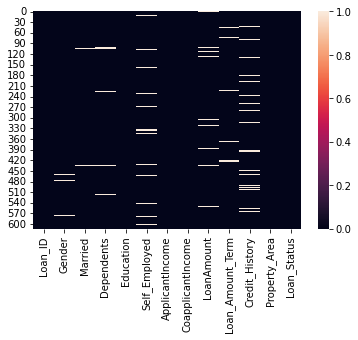

In [6]:
sns.heatmap(df.isnull())

In [7]:
print (df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Summary Statistics

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:-
    
1. The mean is more than median in ApplicantIncome.
2. There is a large difference in 75% percentile and max in 
   ApplicantIncome.
3.These observations suggest that there are extreme outliers in these columns.
4. The mean value is higher that 50% it shows there is littel skwness present ApplicantIncome.

{'whiskers': [<matplotlib.lines.Line2D at 0x17b32685310>,
 'caps': [<matplotlib.lines.Line2D at 0x17b32685970>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b32685040>],
 'medians': [<matplotlib.lines.Line2D at 0x17b32685e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b32695160>],
 'means': []}

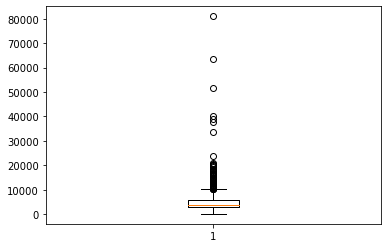

In [10]:
plt.boxplot(df.ApplicantIncome)

Text(0.5, 1.0, 'ApplicantIncome')

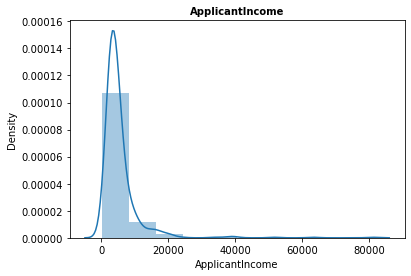

In [11]:
sns.distplot(df['ApplicantIncome'],bins=10)
plt.title('ApplicantIncome',fontsize=10,fontweight="bold")

In [12]:
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df['ApplicantIncome'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      150.0
0.1     2216.1
0.2     2605.4
0.3     3050.4
0.4     3406.8
0.5     3812.5
0.6     4343.6
0.7     5185.6
0.8     6252.4
0.9     9459.9
1.0    81000.0
Name: ApplicantIncome, dtype: float64

In [16]:
dfcor=df.corr()
dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

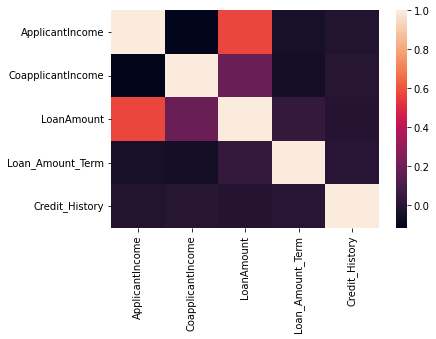

In [17]:
#corellation heat map
sns.heatmap(dfcor)

<AxesSubplot:>

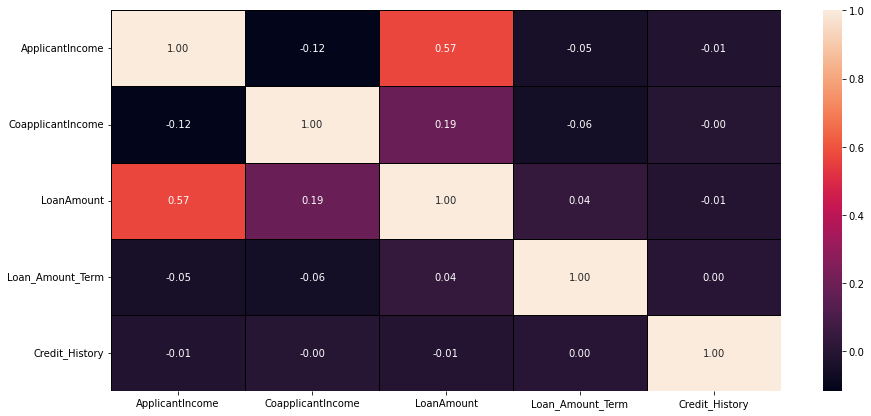

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

We can observe that the ApplicantIncome and LoanAmount are slightly correlated and 

In [19]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

    Married  Dependents
0  0.938041    0.077950
1  0.080875    0.984994
2  0.653136    0.338083
3  0.553435    0.681031
4  0.195726    0.481750
5  0.229006    0.427040
6  0.664869    0.836586
7  0.808262    0.135460
8  0.008213    0.886062
9  0.758808    0.962127


Text(0.5, 1.0, 'Applicant Details plot')

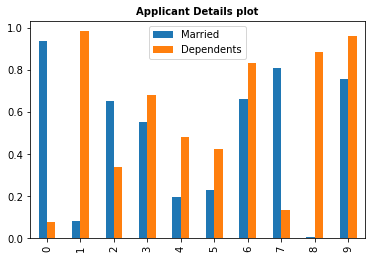

In [7]:
df=pd.DataFrame(np.random.rand(10,2),columns=['Married','Dependents'])
print(df)
df.plot.bar()
plt.title('Applicant Details plot',fontsize=10,fontweight="bold")

   Education  Self_Employed  ApplicantIncome
0   0.788120       0.771283         0.437851
1   0.115583       0.499768         0.491716
2   0.880779       0.599378         0.428213
3   0.478520       0.859626         0.409912
4   0.426480       0.616013         0.637822
5   0.208427       0.564495         0.538131
6   0.988450       0.277606         0.784145
7   0.309661       0.334800         0.818255
8   0.350416       0.138629         0.479348
9   0.731990       0.560236         0.892559


Text(0.5, 1.0, 'Applicant Details plot')

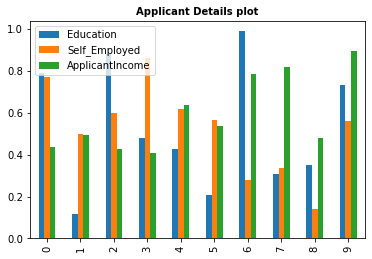

In [23]:
df=pd.DataFrame(np.random.rand(10,3),columns=['Education','Self_Employed', 'ApplicantIncome',])
print(df)
df.plot.bar()
plt.title('Applicant Details plot',fontsize=10,fontweight="bold")

   ApplicantIncome  LoanAmount
0         0.128041    0.691076
1         0.118388    0.626463
2         0.522163    0.652403
3         0.065528    0.240102
4         0.447810    0.202822
5         0.441370    0.414285
6         0.943827    0.062579
7         0.768992    0.112960
8         0.256839    0.491222
9         0.068097    0.354642


Text(0.5, 1.0, 'Applicant Details plot')

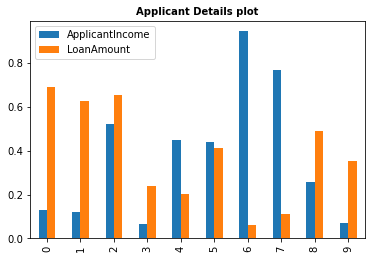

In [25]:
df=pd.DataFrame(np.random.rand(10,2),columns=[ 'ApplicantIncome','LoanAmount'])
print(df)
df.plot.bar()
plt.title('Applicant Details plot',fontsize=10,fontweight="bold")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

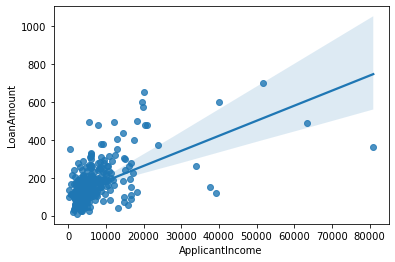

In [4]:
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df)

We can observe that most of the ApplicantIncome are less but there loan amount is higher

Text(0.5, 1.0, 'Loan_Status')

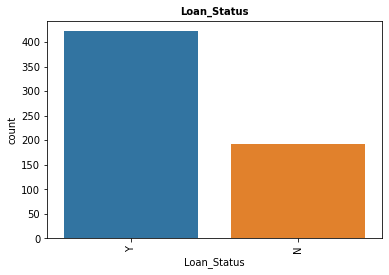

In [5]:
sns.countplot(x='Loan_Status',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('Loan_Status',fontsize=10,fontweight="bold")